In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
from sklearn.cluster import KMeans
from scipy import stats
import geopandas as gpd
import os
import warnings
warnings.filterwarnings("ignore")
#from dataset import laod_dataset

In [6]:
df = pd.read_csv("hf://datasets/AHFIDAILabs/CS4RRA/African Climate Data.csv")

In [7]:
df.head(2)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,5/16/2024 9:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,5:40 AM,7:50 PM,1:15 PM,2:14 AM,Waxing Gibbous,55
1,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,5/16/2024 9:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,6:12 AM,5:55 PM,1:17 PM,12:38 AM,Waxing Gibbous,55


In [8]:
df.shape

(22680, 41)

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
df1 = df.copy()

In [11]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [12]:
df1.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       22680 non-null  object 
 1   location_name                 22680 non-null  object 
 2   latitude                      22680 non-null  float64
 3   longitude                     22680 non-null  float64
 4   timezone                      22680 non-null  object 
 5   last_updated_epoch            22680 non-null  int64  
 6   last_updated                  22680 non-null  object 
 7   temperature_celsius           22680 non-null  float64
 8   temperature_fahrenheit        22680 non-null  float64
 9   condition_text                22680 non-null  object 
 10  wind_mph                      22680 non-null  float64
 11  wind_kph                      22680 non-null  float64
 12  wind_degree                   22680 non-null  int64  
 13  w

<Axes: title={'center': 'Observations per Country'}, xlabel='country'>

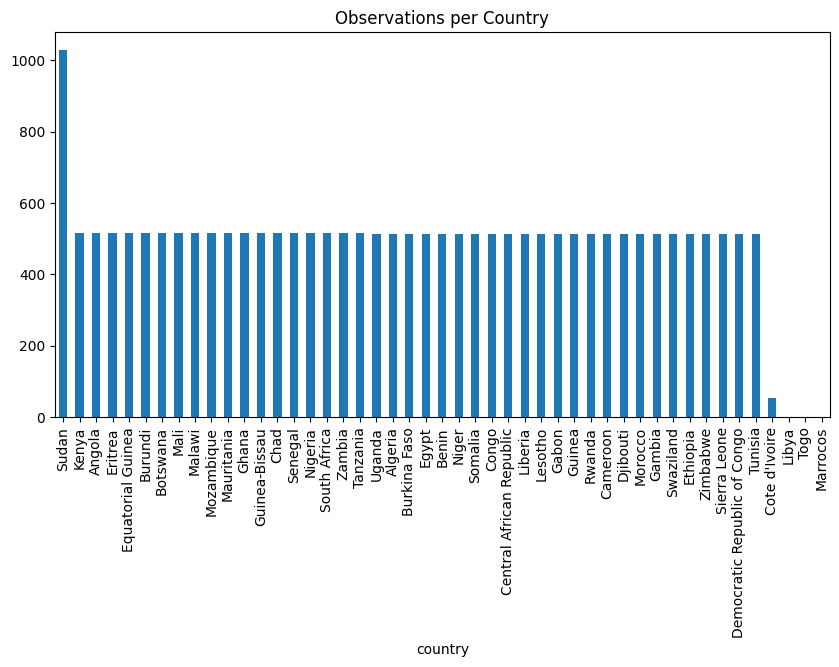

In [14]:
# Observations per country
country_counts = df['country'].value_counts()
country_counts.plot(kind='bar', figsize=(10,5), title='Observations per Country')

In [15]:
# Average metrics per country
country_stats = df.groupby('country')[['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']].mean().sort_values(by='temperature_celsius', ascending=False)
country_stats

,temperature_celsius,humidity,wind_kph,precip_mm
country,,,,
Marrocos,40.300000,14.000000,16.900000,0.000000
Djibouti,33.029045,52.594542,16.635088,0.026199
Sudan,31.439397,29.162451,20.915467,0.022597
Chad,31.301165,44.537864,16.614563,0.057476
Niger,30.705837,44.717899,19.342218,0.032198
Burkina Faso,29.435214,54.867704,16.436770,0.068852
Central African Republic,29.348833,63.887160,6.650778,0.142626
Somalia,28.887743,74.669261,28.292023,0.030350
Benin,28.677237,76.926070,12.863619,0.118599


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,22680.0,3.727105e+00,1.605283e+01,-2.932000e+01,-4.260000e+00,6.310600e+00,1.237030e+01,3.680280e+01
longitude,22680.0,1.520627e+01,1.867768e+01,-1.744000e+01,-2.167000e-01,1.528470e+01,3.113330e+01,4.537000e+01
last_updated_epoch,22680.0,1.738191e+09,1.288729e+07,1.715849e+09,1.727085e+09,1.738232e+09,1.749372e+09,1.760343e+09
temperature_celsius,22680.0,2.621781e+01,4.986073e+00,3.400000e+00,2.330000e+01,2.630000e+01,2.920000e+01,4.710000e+01
temperature_fahrenheit,22680.0,7.919356e+01,8.974740e+00,3.820000e+01,7.390000e+01,7.930000e+01,8.460000e+01,1.168000e+02
wind_mph,22680.0,8.158448e+00,1.308076e+01,2.200000e+00,4.500000e+00,7.200000e+00,1.070000e+01,1.841200e+03
wind_kph,22680.0,1.313206e+01,2.105098e+01,3.600000e+00,7.200000e+00,1.150000e+01,1.730000e+01,2.963200e+03
wind_degree,22680.0,1.712265e+02,9.908920e+01,1.000000e+00,8.000000e+01,1.800000e+02,2.480000e+02,3.600000e+02
pressure_mb,22680.0,1.015171e+03,5.117556e+00,9.980000e+02,1.012000e+03,1.014000e+03,1.017000e+03,1.040000e+03
pressure_in,22680.0,2.997685e+01,1.516606e-01,2.948000e+01,2.988000e+01,2.994000e+01,3.003000e+01,3.071000e+01


In [17]:
print("\nTop 10 Countries:\n", df['country'].value_counts().head(10))


Top 10 Countries:
 country
Sudan                1028
Kenya                 516
Angola                515
Eritrea               515
Equatorial Guinea     515
Burundi               515
Botswana              515
Mali                  515
Malawi                515
Mozambique            515
Name: count, dtype: int64


In [18]:
save_dir = r"C:\Users\hp\Desktop\CSS4RRA\climate_charts"
os.makedirs(save_dir, exist_ok=True)

In [19]:
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False))
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone             

In [20]:
# GEOGRAPHIC & COUNTRY-LEVEL EXPLORATION

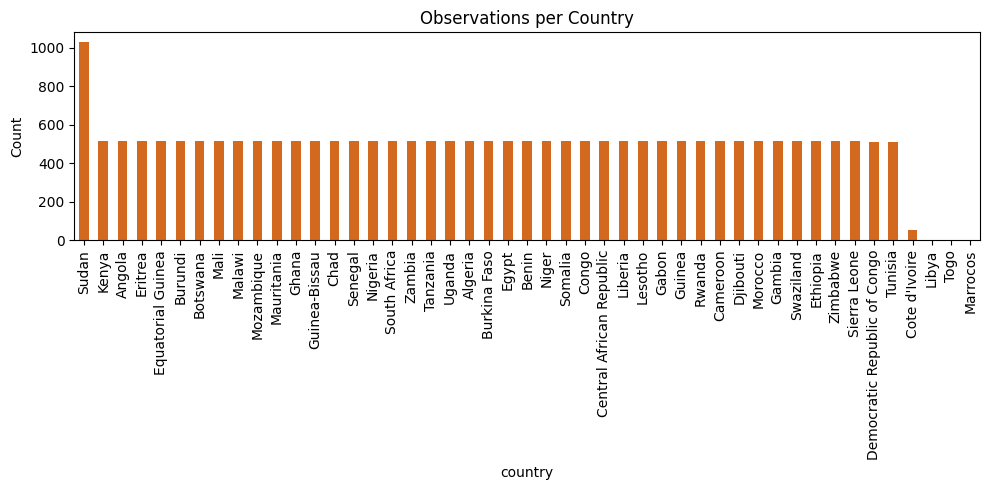

In [21]:
plt.figure(figsize=(10,5))
df['country'].value_counts().plot(kind='bar', color='chocolate')
plt.title("Observations per Country")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "observations_per_country.png"))
plt.show()

In [22]:
# Average metrics per country
country_stats = df.groupby('country')[['temperature_celsius','humidity','wind_kph','precip_mm']].mean()
country_stats.sort_values(by='temperature_celsius', ascending=False, inplace=True)

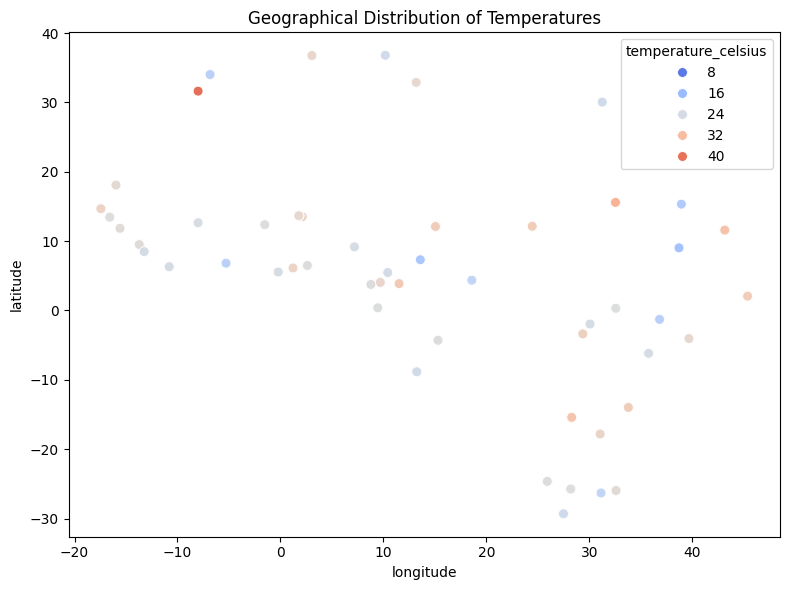

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='temperature_celsius', palette='coolwarm', s=50)
plt.title("Geographical Distribution of Temperatures")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "geo_temperature_distribution.png"))
plt.show()

In [24]:
# WEATHER CONDITIONS OVERVIEW

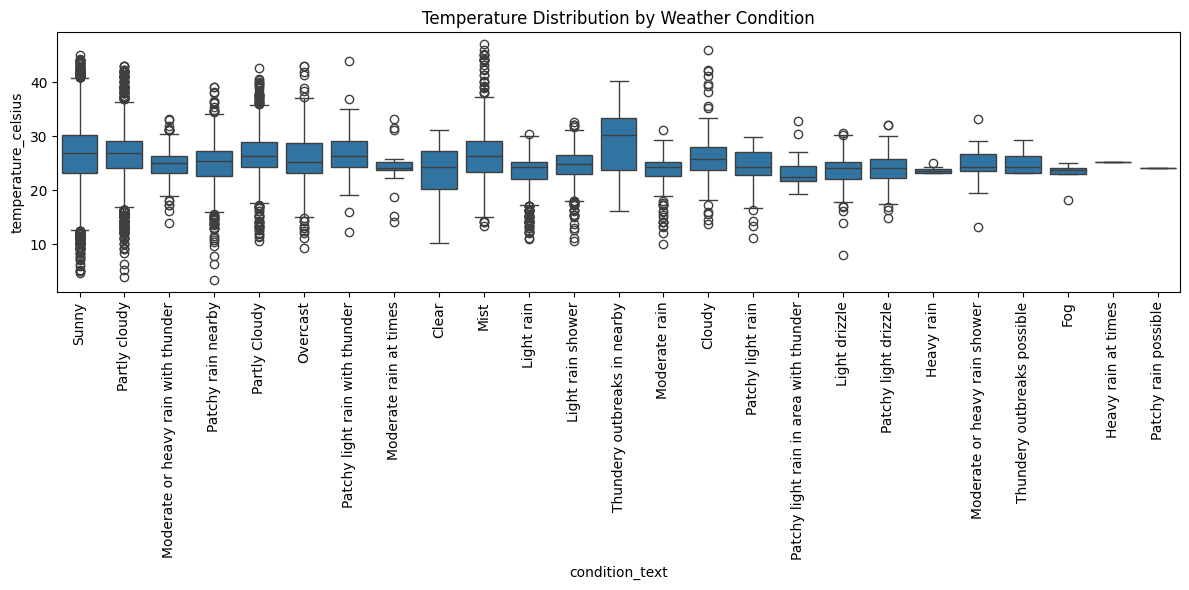

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='condition_text', y='temperature_celsius', data=df)
plt.xticks(rotation=90)
plt.title("Temperature Distribution by Weather Condition")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "temp_by_condition.png"))
plt.show()

In [26]:
# Condition-level statistics
condition_stats = df.groupby('condition_text')[['temperature_celsius','humidity','precip_mm']].mean()
condition_stats.to_csv(os.path.join(save_dir, "condition_stats.csv"))
condition_stats.head()

,temperature_celsius,humidity,precip_mm
condition_text,,,
Clear,23.612121,56.818182,0.000303
Cloudy,26.273964,68.284024,0.000000
Fog,22.983333,98.000000,0.000000
Heavy rain,23.758333,97.000000,10.234167
Heavy rain at times,25.300000,94.000000,0.080000


In [27]:
# temporal patterns

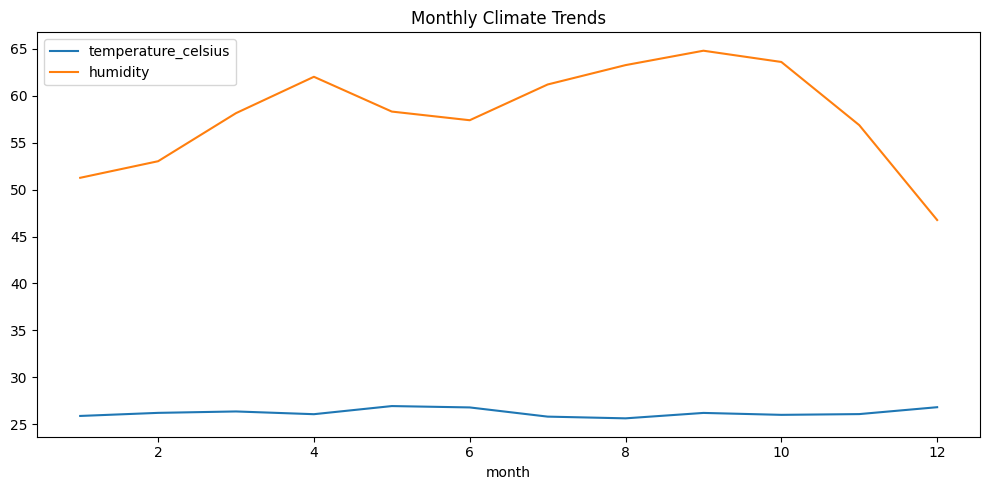

<Figure size 640x480 with 0 Axes>

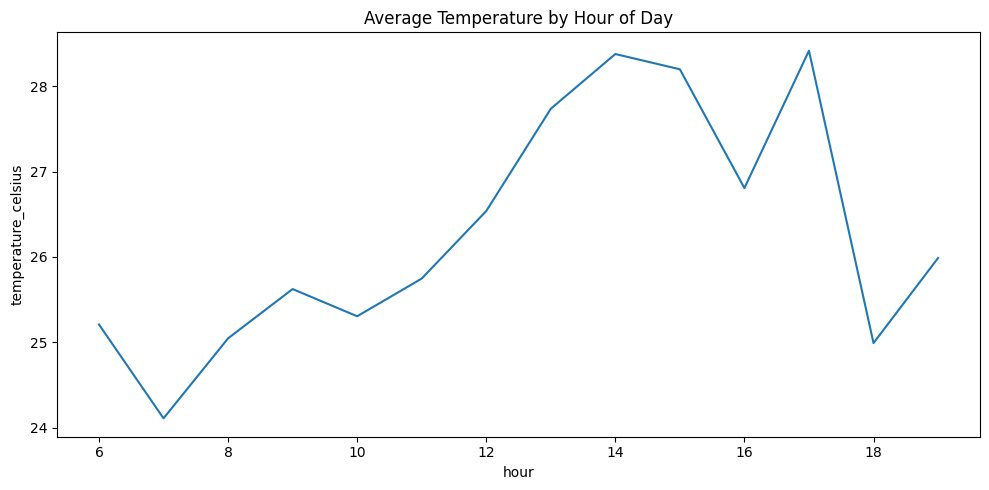

In [28]:
# Convert date column
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df['month'] = df['last_updated'].dt.month
df['hour'] = df['last_updated'].dt.hour

# Monthly trends
monthly_avg = df.groupby('month')[['temperature_celsius','humidity']].mean()
monthly_avg.plot(kind='line', figsize=(10,5))
plt.title("Monthly Climate Trends")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(save_dir, "monthly_climate_trends.png"))

# Hourly variation
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='hour', y='temperature_celsius', ci=None)
plt.title("Average Temperature by Hour of Day")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "temp_by_hour.png"))
plt.show()

In [29]:
# AIR QUALITY ANALYSIS

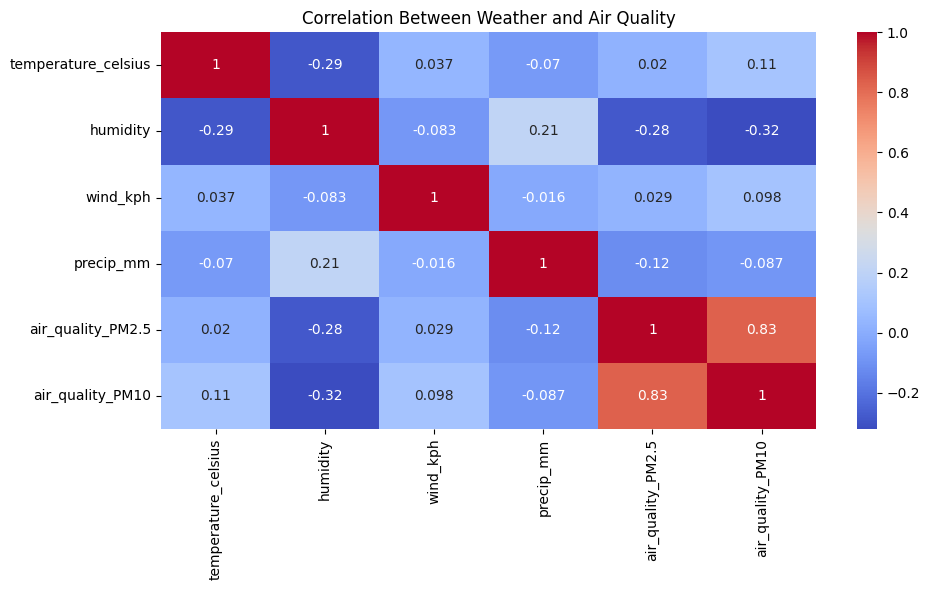

In [30]:
# Air quality averages per country
air_quality = df.groupby('country')[['air_quality_PM2.5','air_quality_PM10','air_quality_Ozone','air_quality_us-epa-index']].mean()
air_quality.to_csv(os.path.join(save_dir, "air_quality_by_country.csv"))

# Correlation matrix
corr = df[['temperature_celsius','humidity','wind_kph','precip_mm','air_quality_PM2.5','air_quality_PM10']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather and Air Quality")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "weather_air_quality_corr.png"))
plt.show()


In [31]:
# CLIMATE RISK INDICATORS

In [32]:
# Compute drought index
drought_risk = df.groupby('country')[['temperature_celsius','precip_mm']].mean()
drought_risk['drought_index'] = drought_risk['temperature_celsius'] / (drought_risk['precip_mm'] + 1)

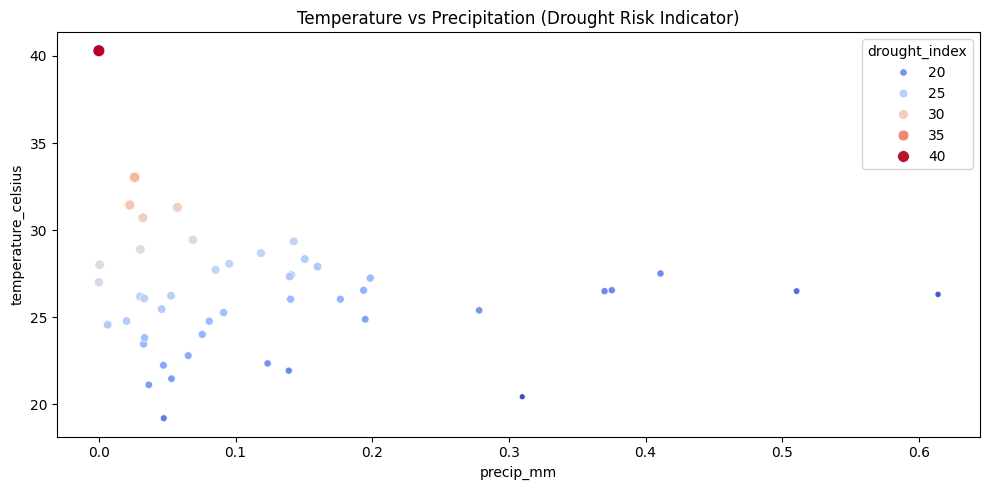

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=drought_risk, x='precip_mm', y='temperature_celsius', hue='drought_index', size='drought_index', palette='coolwarm')
plt.title("Temperature vs Precipitation (Drought Risk Indicator)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "drought_risk.png"))
plt.show()

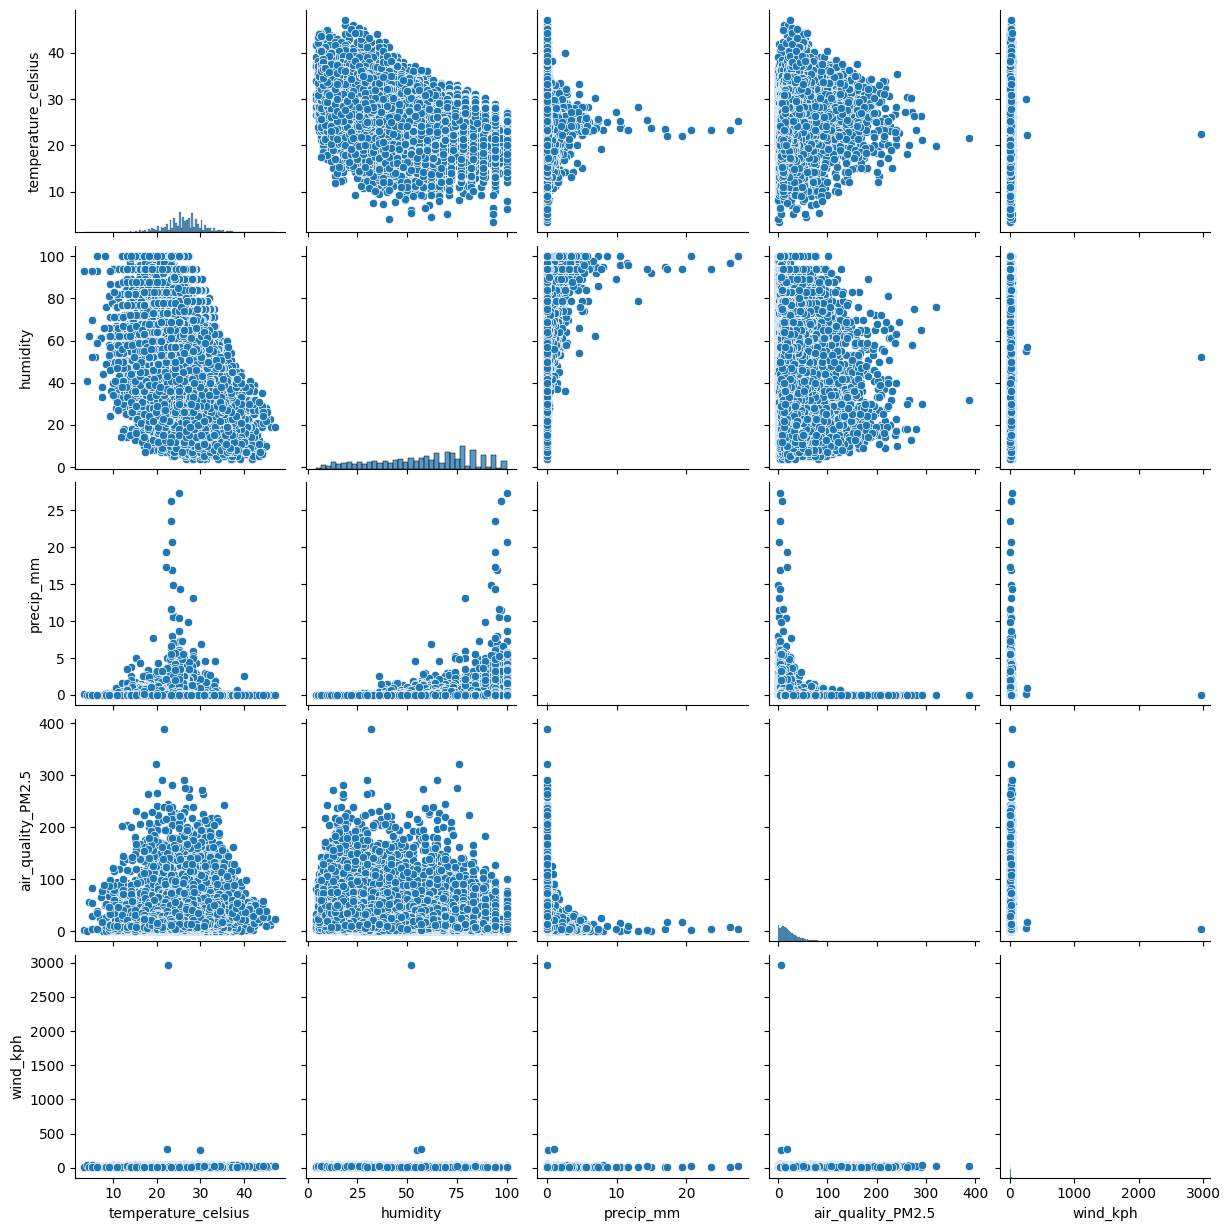

In [35]:
# Variance by country
variance_df = df.groupby('country')[['temperature_celsius','humidity','precip_mm']].var()
variance_df.to_csv(os.path.join(save_dir, "weather_variance_by_country.csv"))

# Pairplot
sns.pairplot(df[['temperature_celsius','humidity','precip_mm','air_quality_PM2.5','wind_kph']])
plt.savefig(os.path.join(save_dir, "pairplot_weather_features.png"))
plt.show()

In [36]:
# Clustering Climate Zones

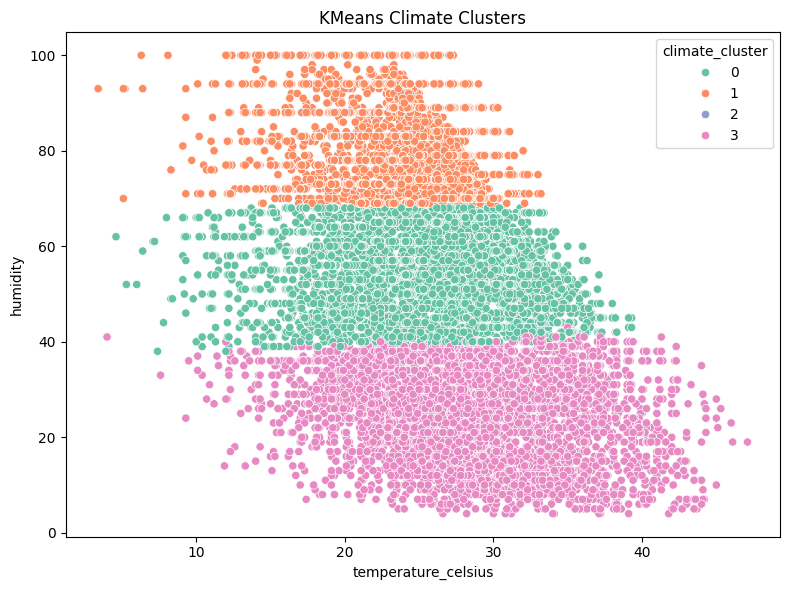

In [37]:
features = df[['temperature_celsius','humidity','precip_mm','wind_kph']].dropna()
kmeans = KMeans(n_clusters=4, random_state=42)
df['climate_cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(8,6))
sns.scatterplot(x='temperature_celsius', y='humidity', hue='climate_cluster', data=df, palette='Set2')
plt.title("KMeans Climate Clusters")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "climate_clusters.png"))
plt.show()


In [38]:
# anomaly detection

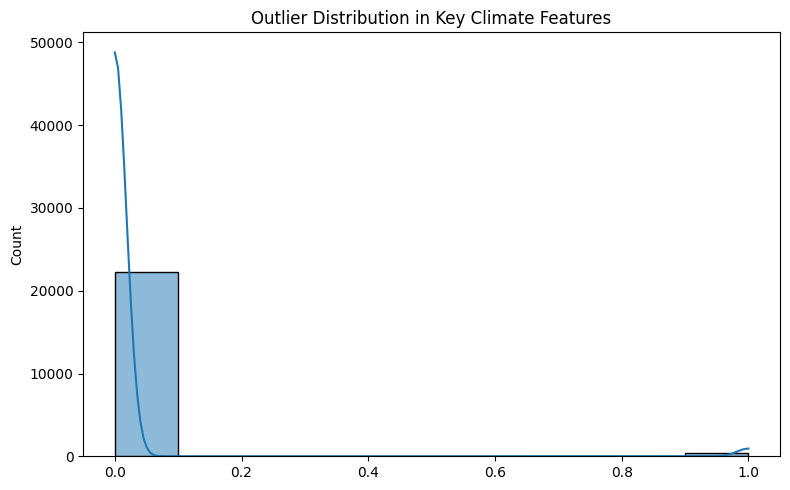

In [39]:
z_scores = np.abs(stats.zscore(df[['temperature_celsius','humidity','precip_mm']].dropna()))
outliers = (z_scores > 3).sum(axis=1)

plt.figure(figsize=(8,5))
sns.histplot(outliers, bins=10, kde=True)
plt.title("Outlier Distribution in Key Climate Features")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "outlier_distribution.png"))
plt.show()


In [40]:
# cecking normaly distributed or skewed features

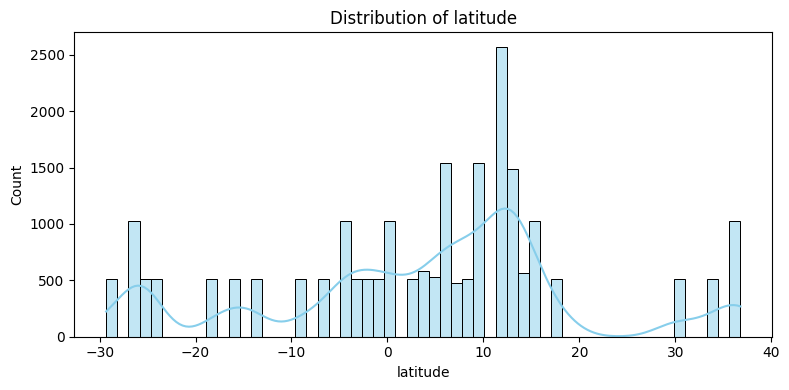

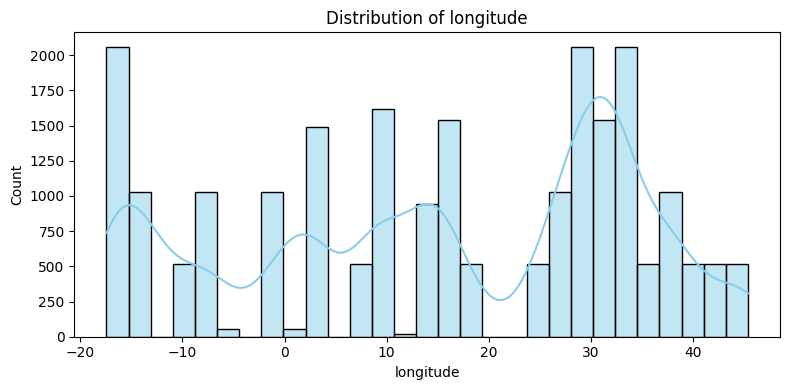

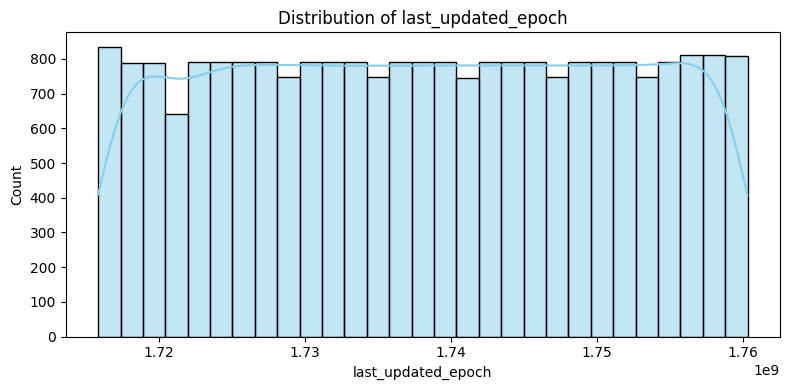

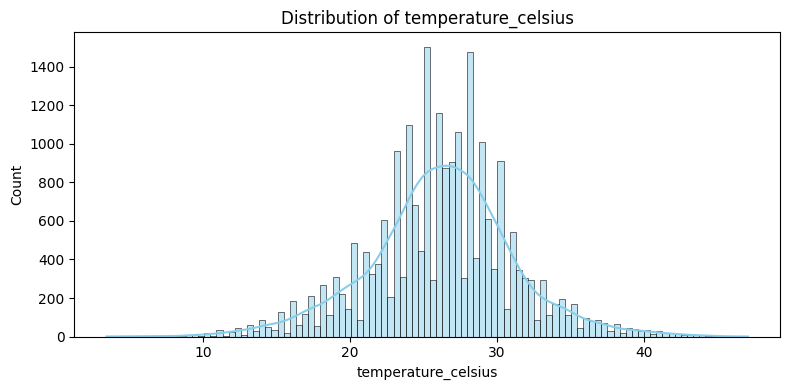

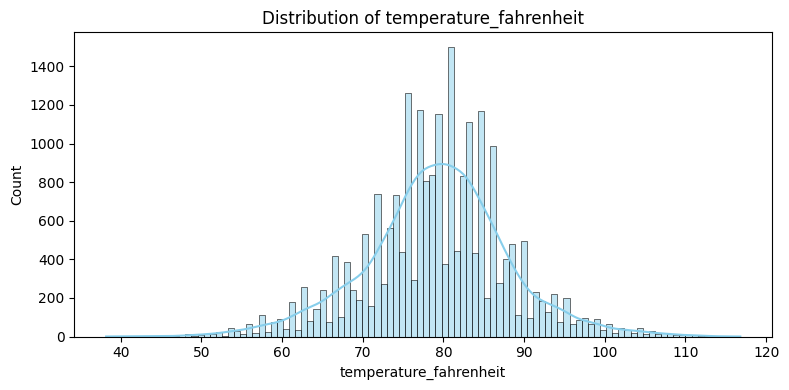

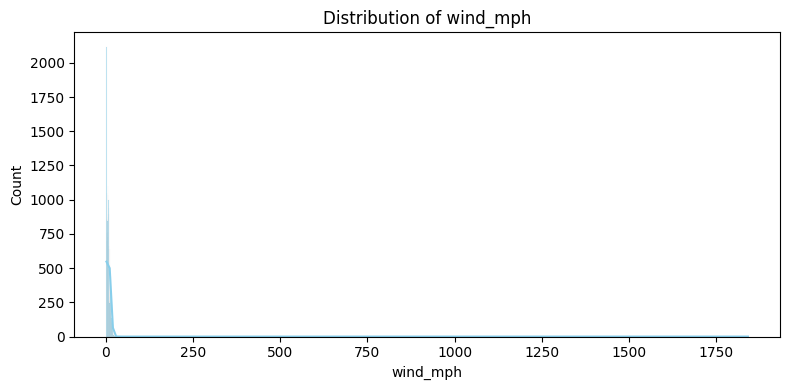

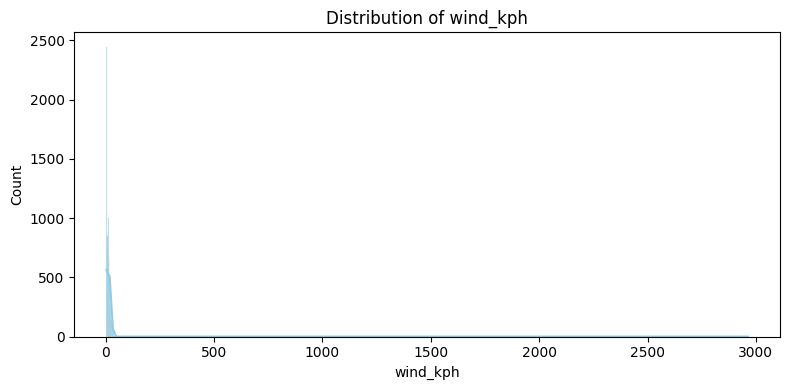

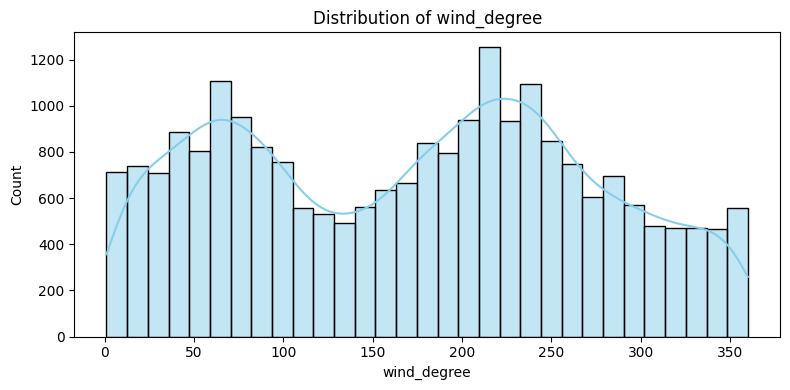

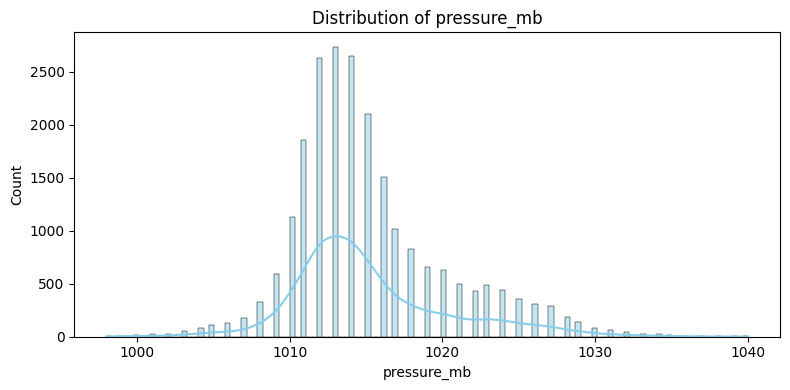

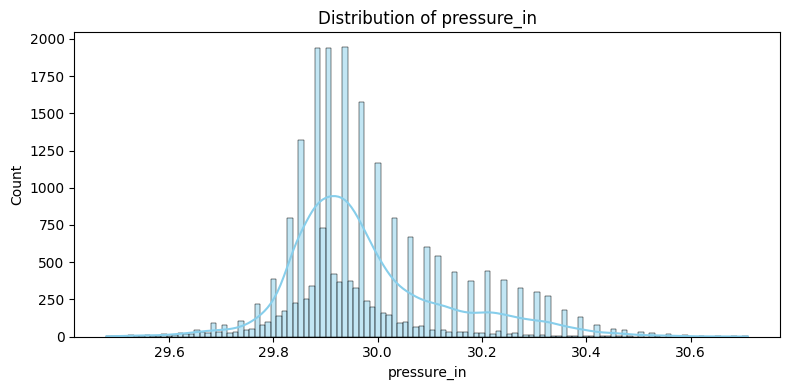

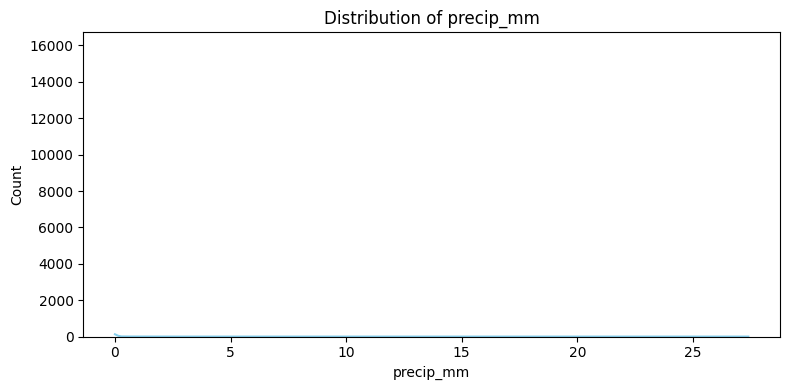

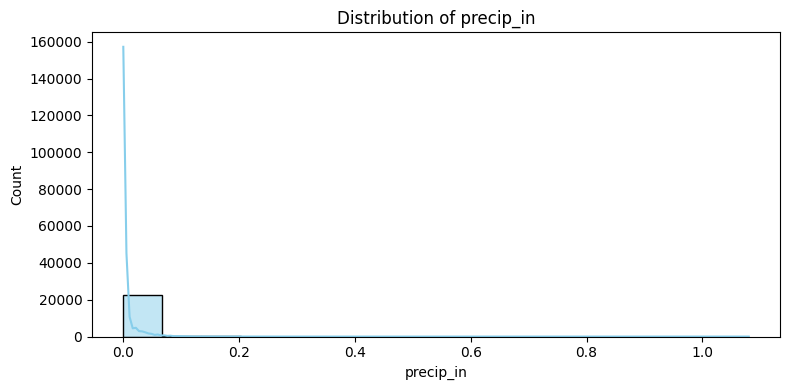

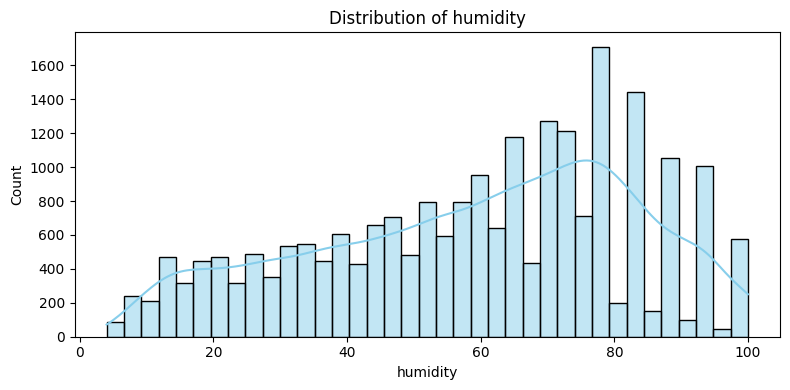

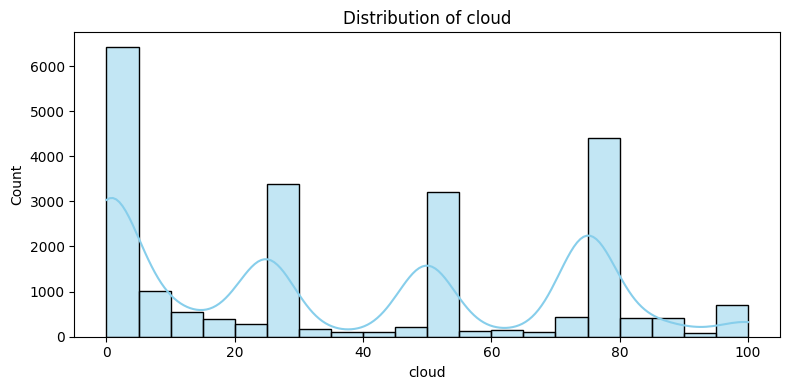

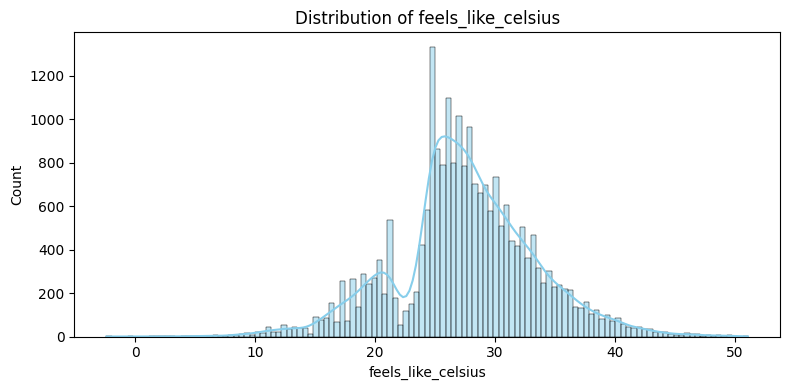

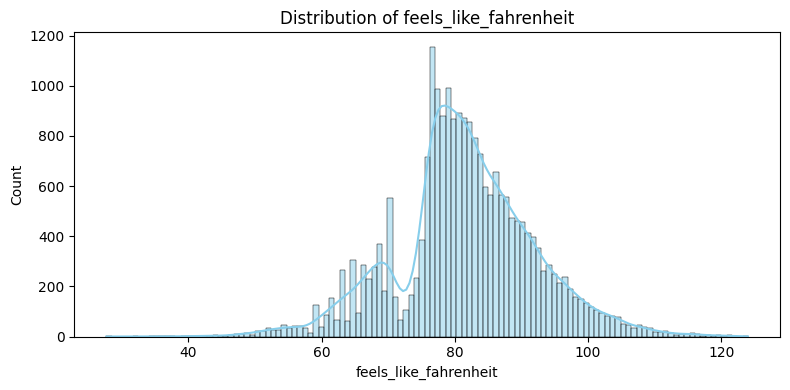

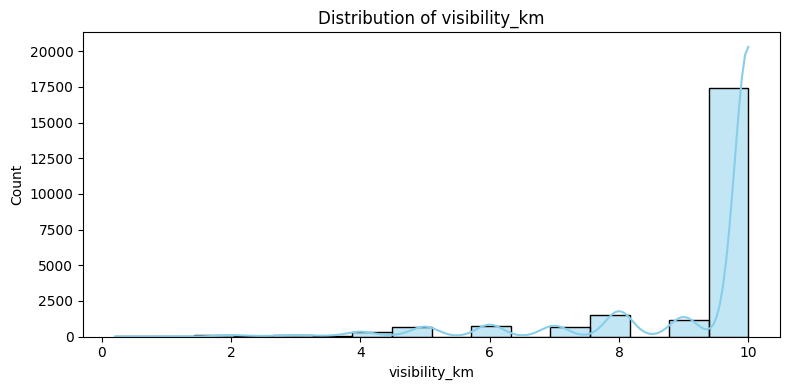

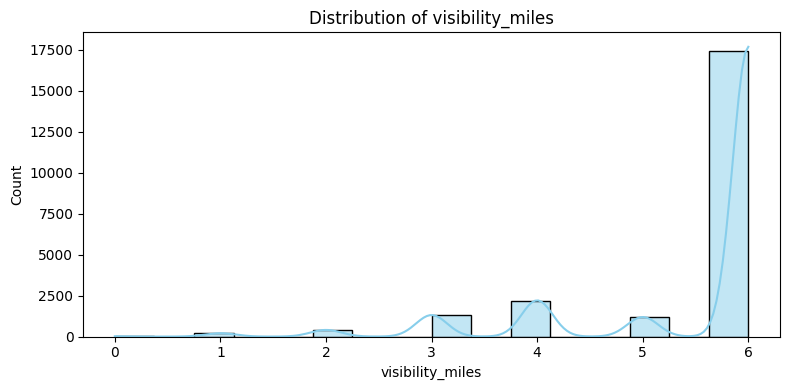

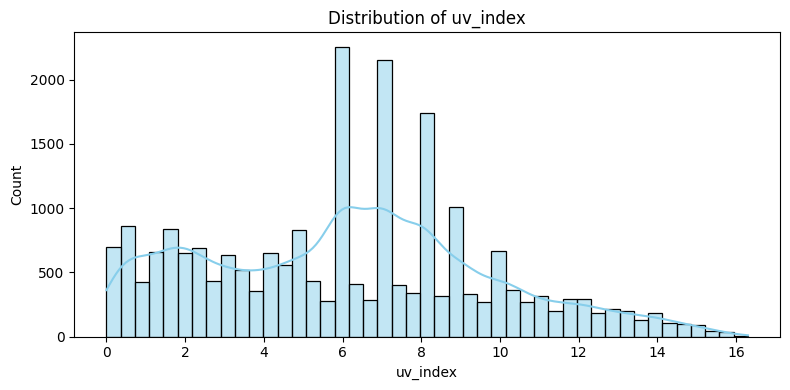

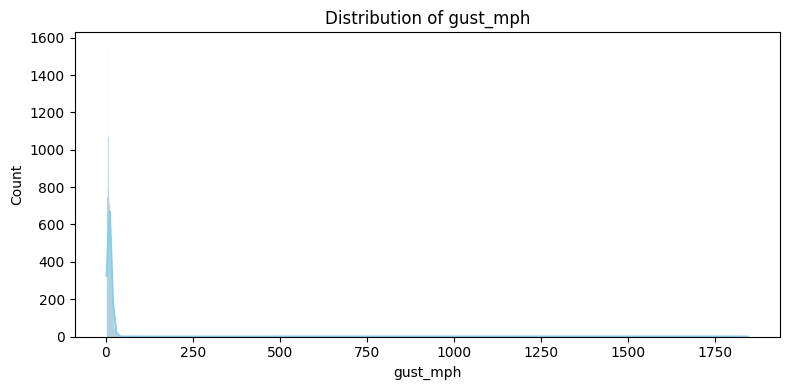

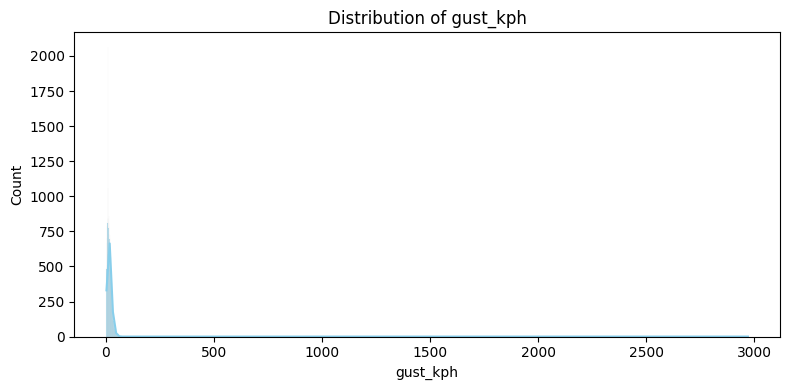

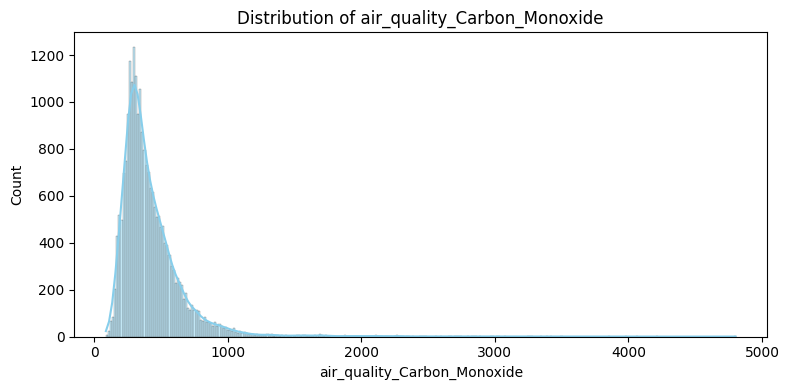

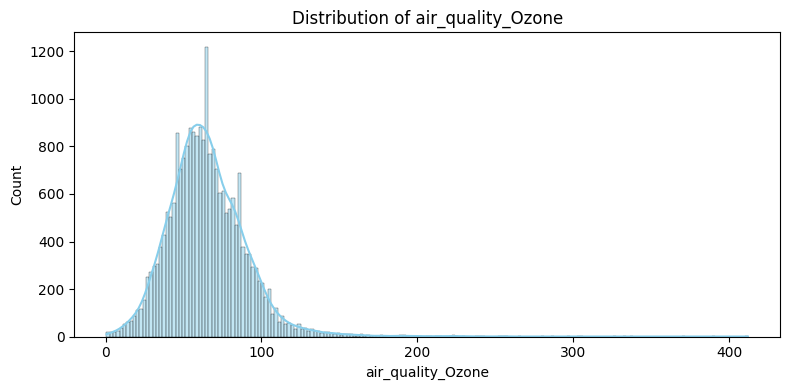

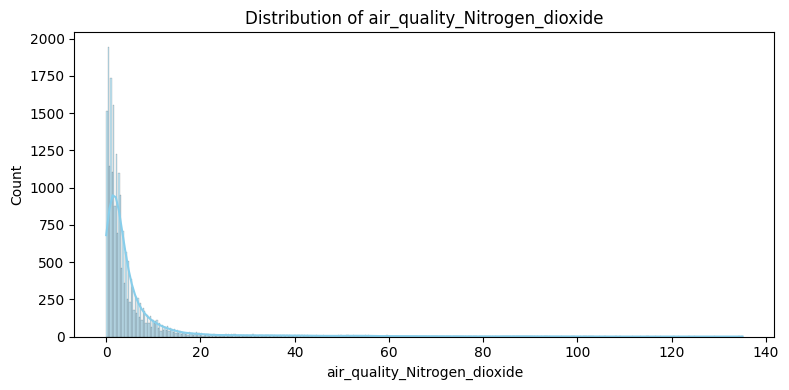

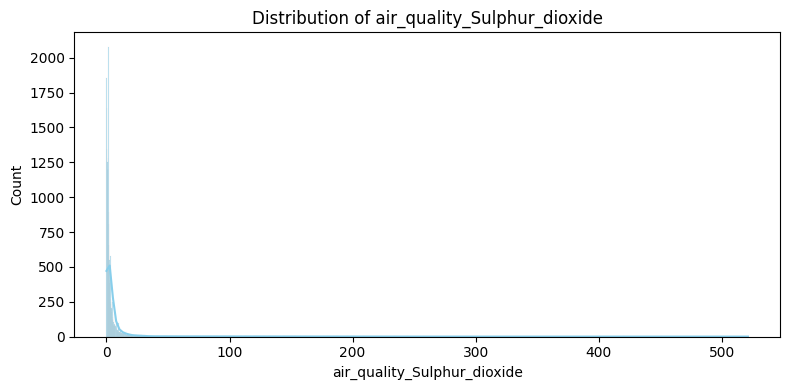

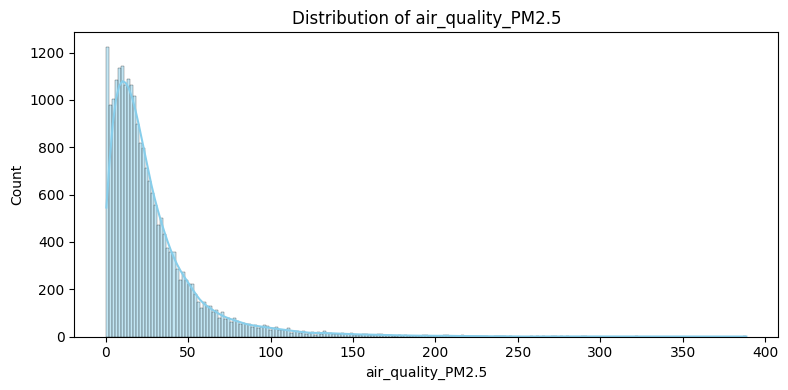

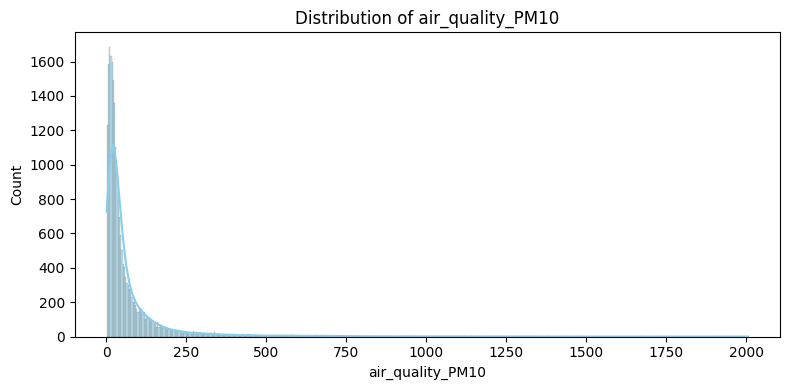

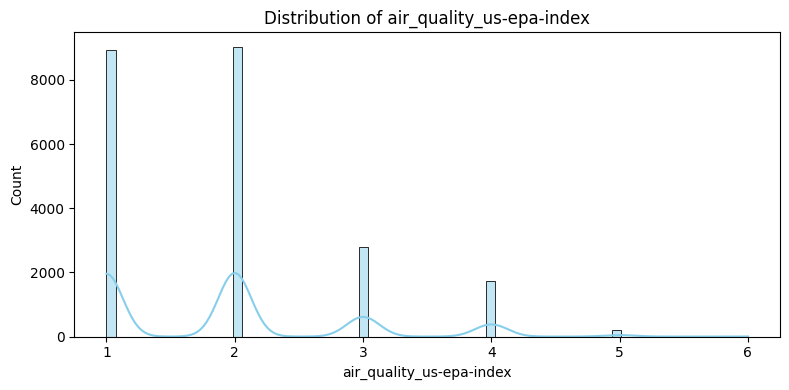

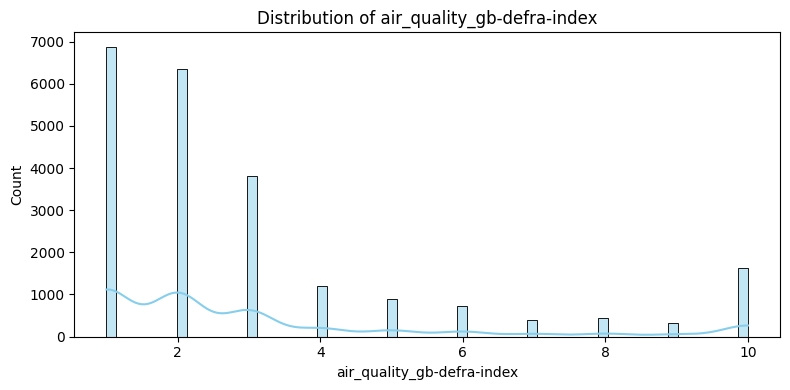

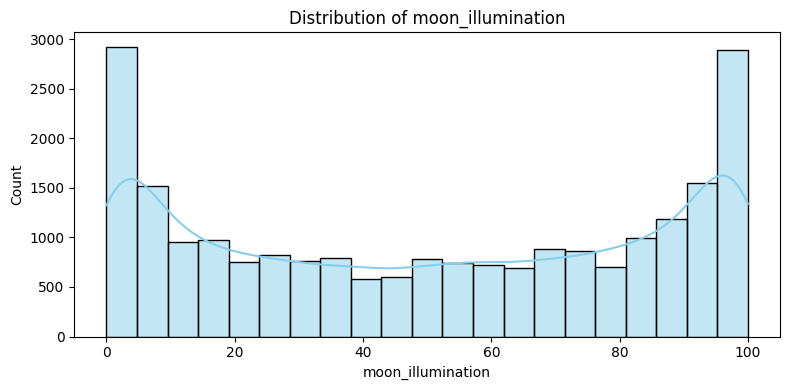

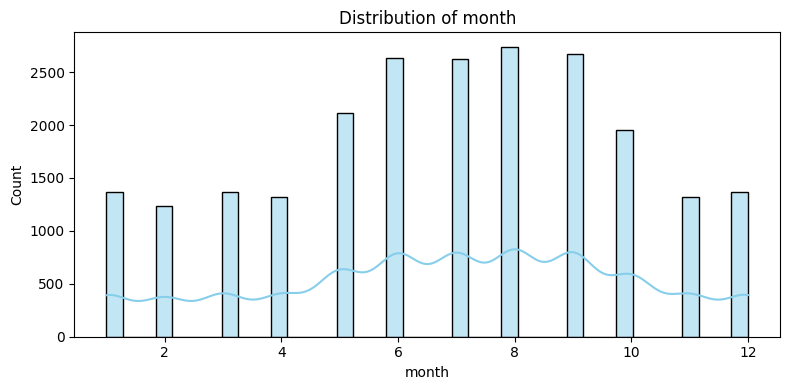

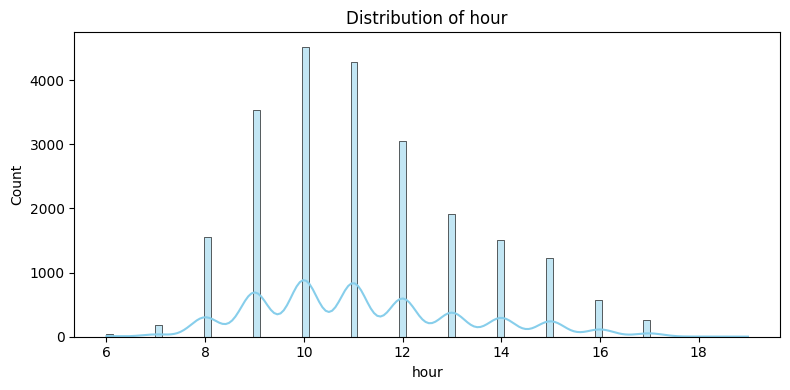

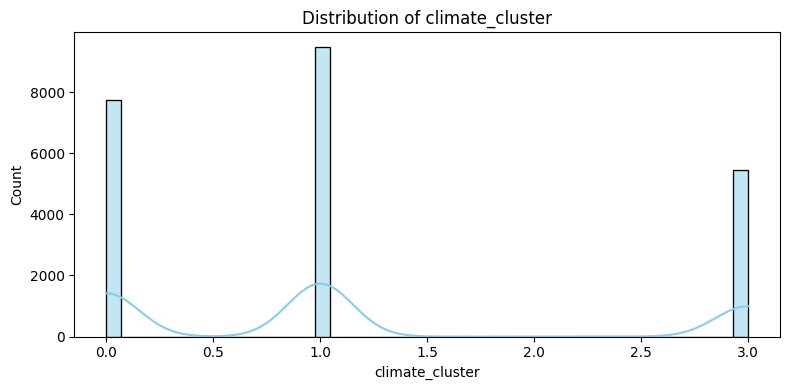

In [41]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.histplot(df[col], kde=True, ax=ax, color="skyblue")
    ax.set_title(f"Distribution of {col}")
    fig.tight_layout()
    fig.savefig(os.path.join(save_dir, f"distribution_{col}.png"))
    plt.show()


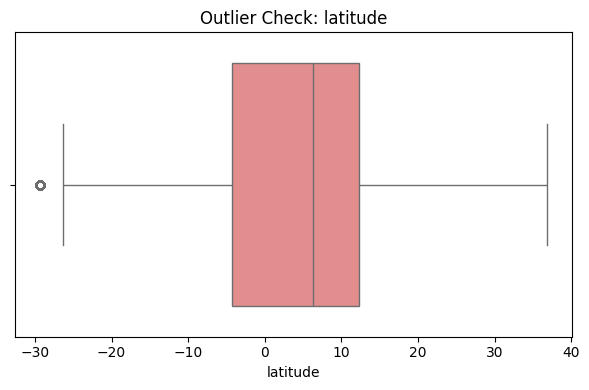

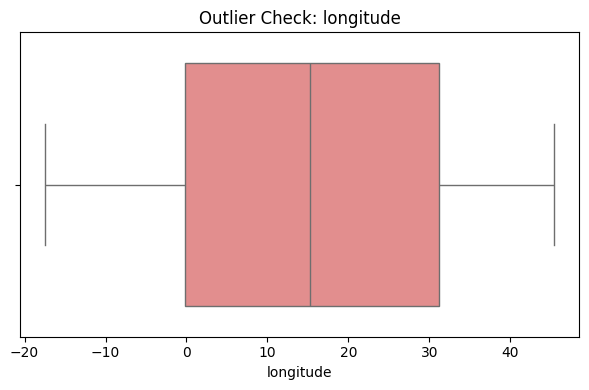

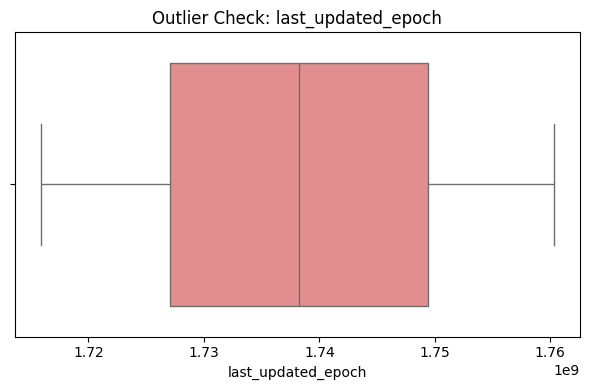

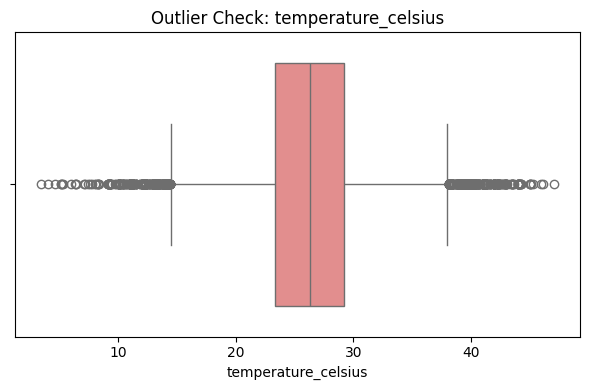

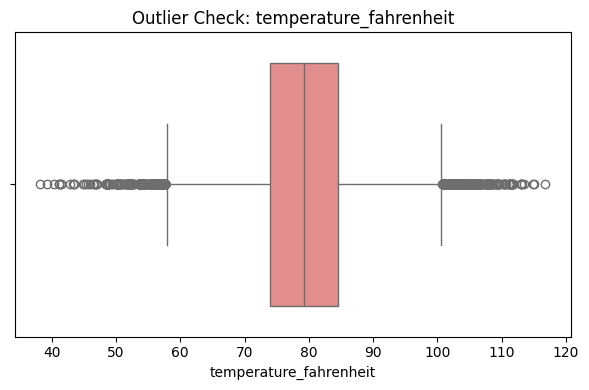

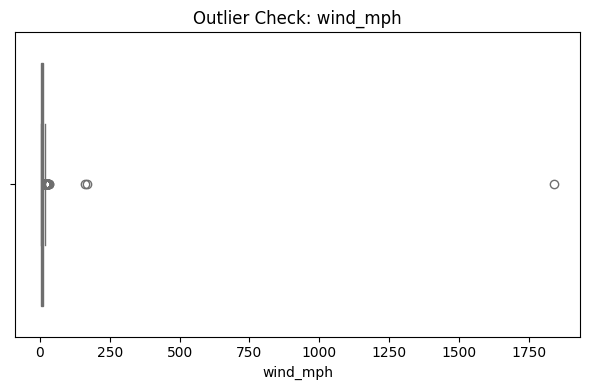

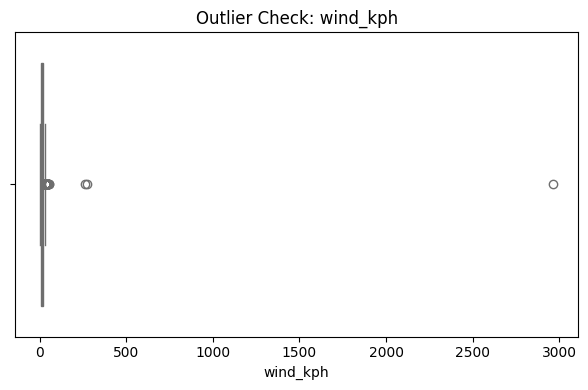

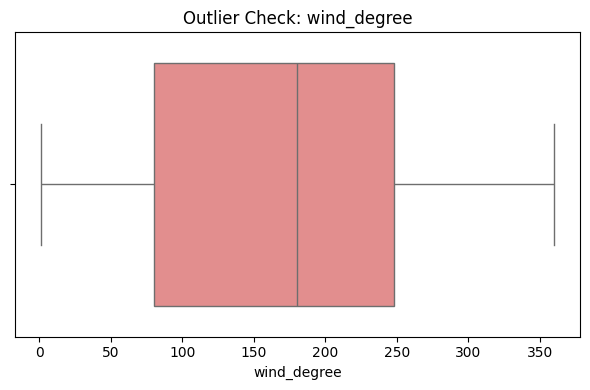

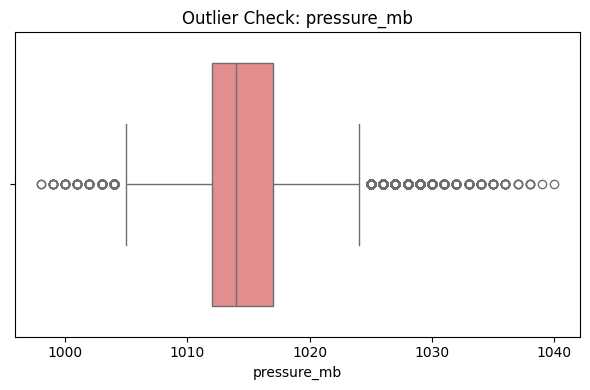

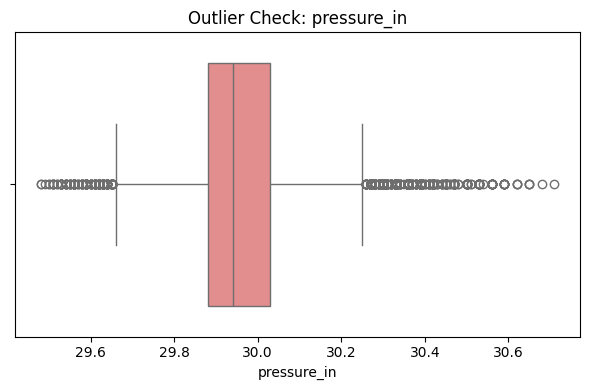

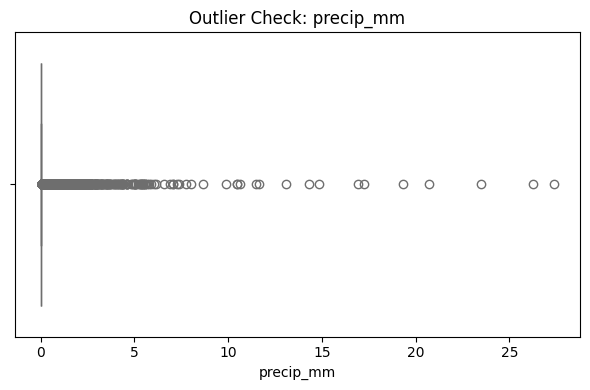

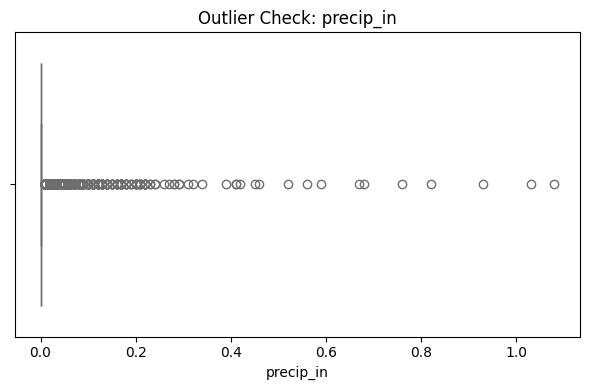

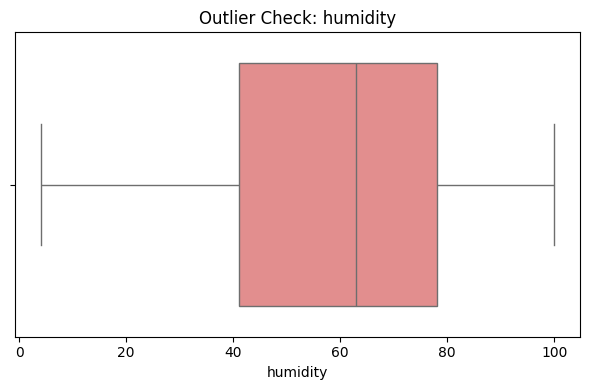

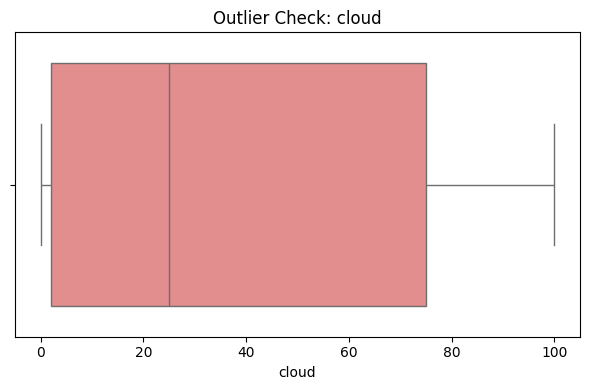

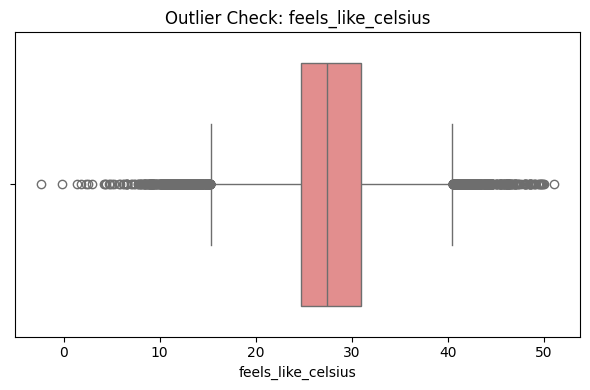

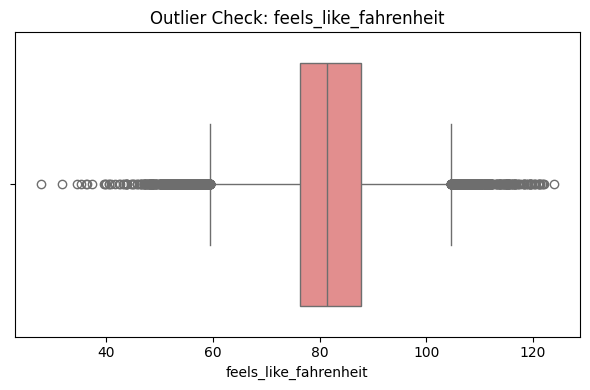

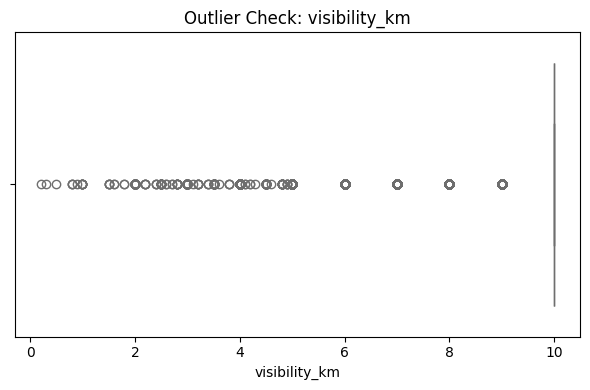

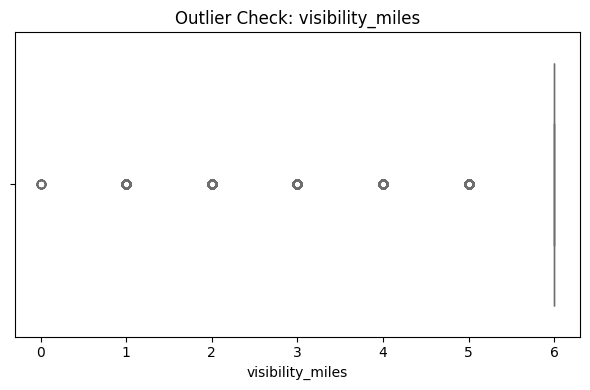

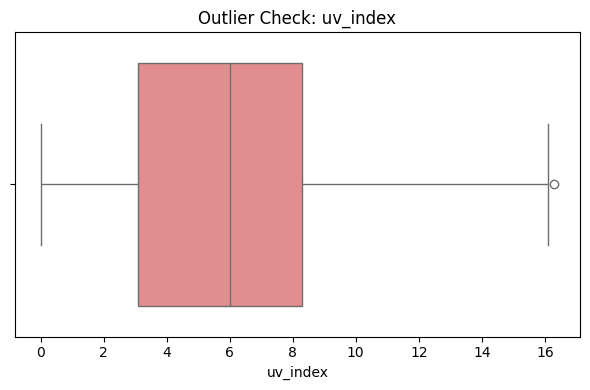

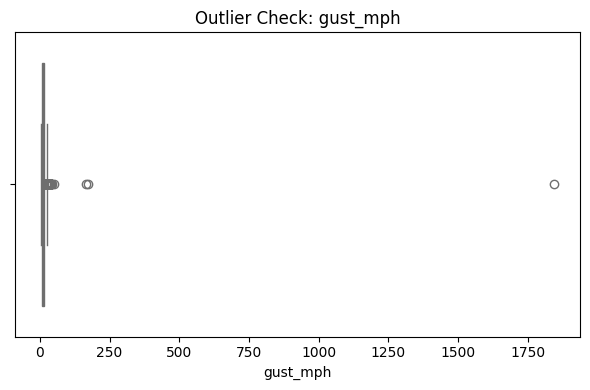

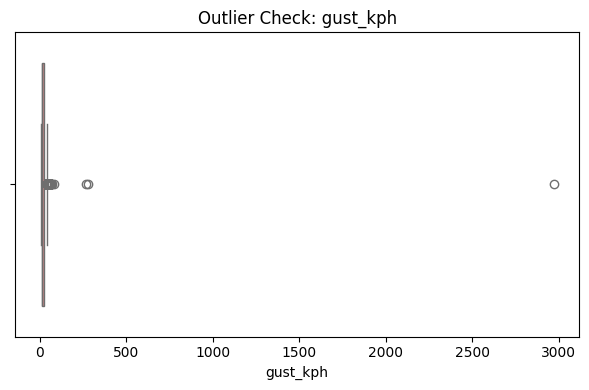

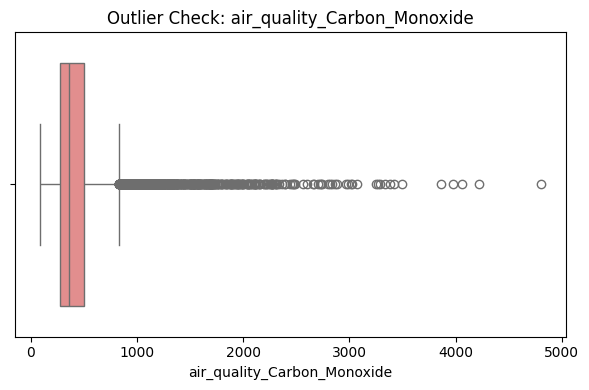

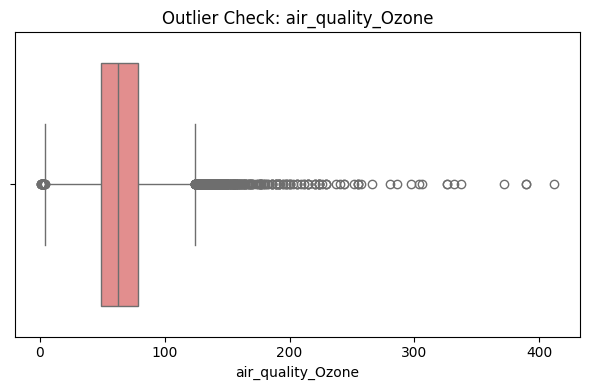

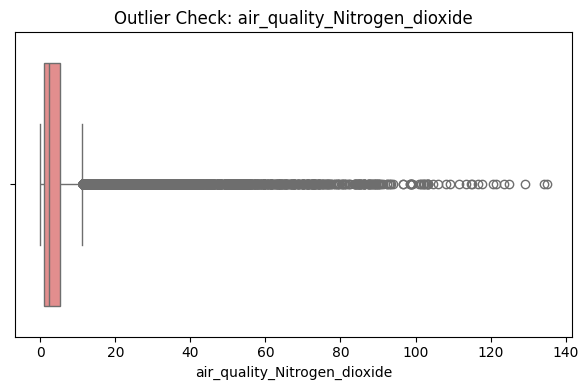

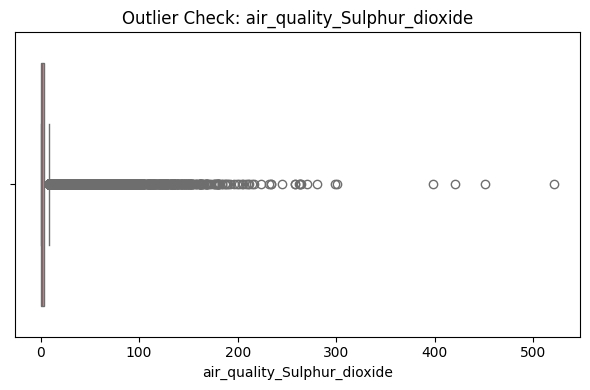

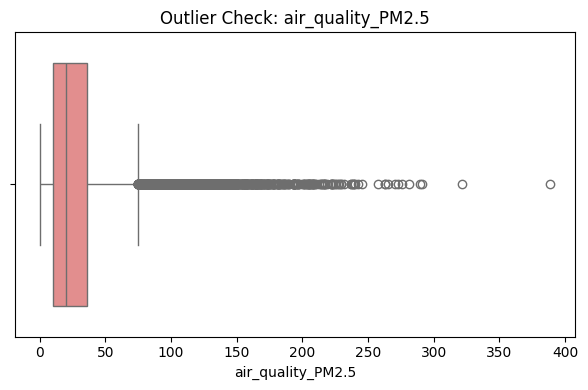

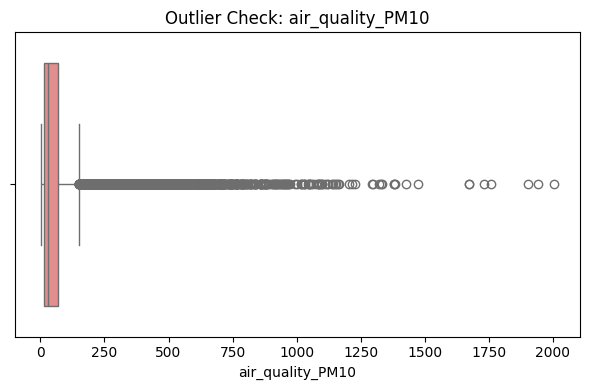

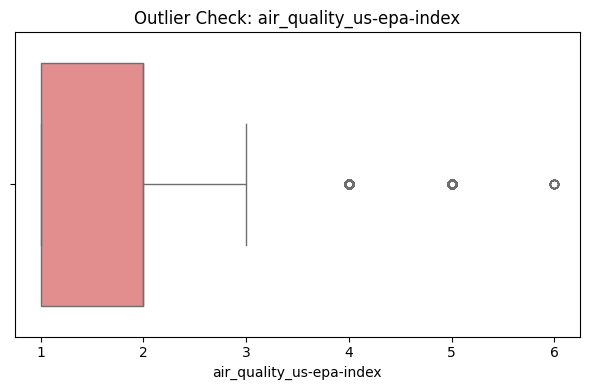

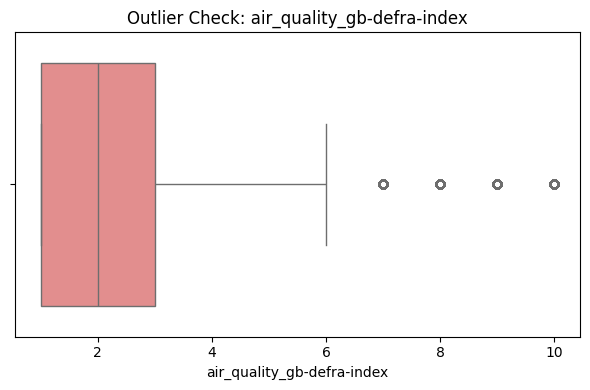

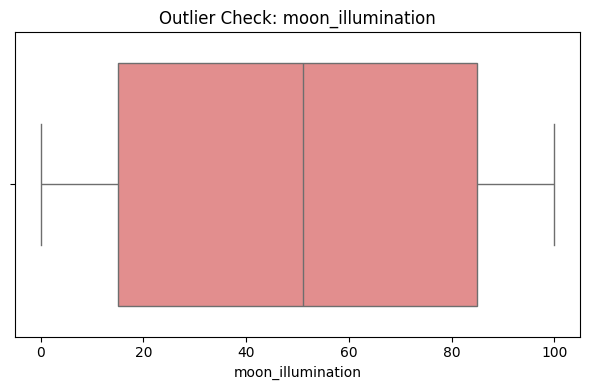

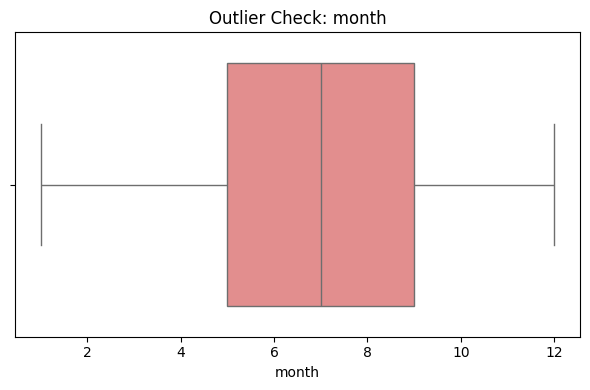

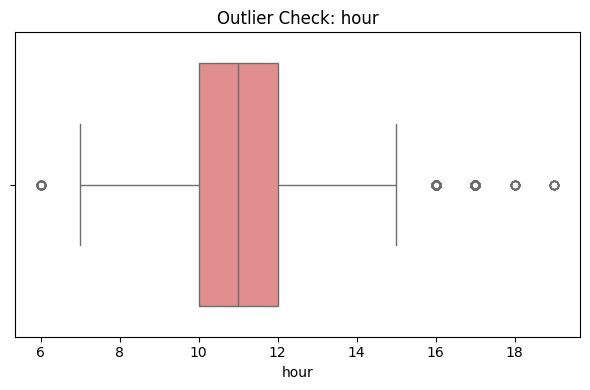

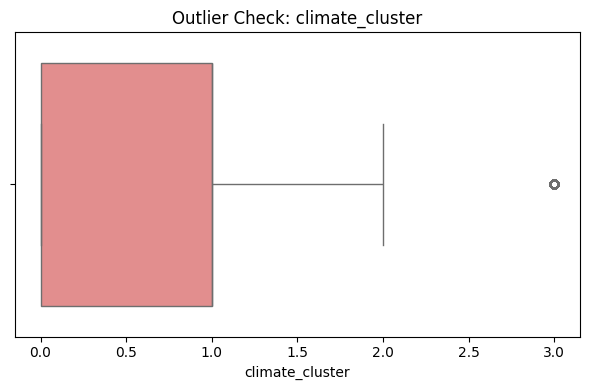

In [42]:
#OUTLIER DETECTION
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(x=df[col], ax=ax, color="lightcoral")
    ax.set_title(f"Outlier Check: {col}")
    fig.tight_layout()
    fig.savefig(os.path.join(save_dir, f"outliers_{col}.png"))
    plt.show()

In [43]:
# --- SKEWNESS ---
skewness = df[num_cols].skew().sort_values(ascending=False)
print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
wind_kph                        121.553457
wind_mph                        121.536167
gust_mph                        107.958594
gust_kph                        107.952479
precip_mm                        19.023166
precip_in                        18.918422
air_quality_Sulphur_dioxide       8.061447
air_quality_PM10                  4.946341
air_quality_Nitrogen_dioxide      4.822697
air_quality_Carbon_Monoxide       4.083721
air_quality_PM2.5                 2.800881
air_quality_Ozone                 1.657407
air_quality_gb-defra-index        1.572779
air_quality_us-epa-index          1.001506
pressure_in                       0.945687
pressure_mb                       0.920062
climate_cluster                   0.717031
hour                              0.581745
cloud                             0.289811
uv_index                          0.244469
wind_degree                       0.027778
last_updated_epoch               -0.010202
moon_illumination     

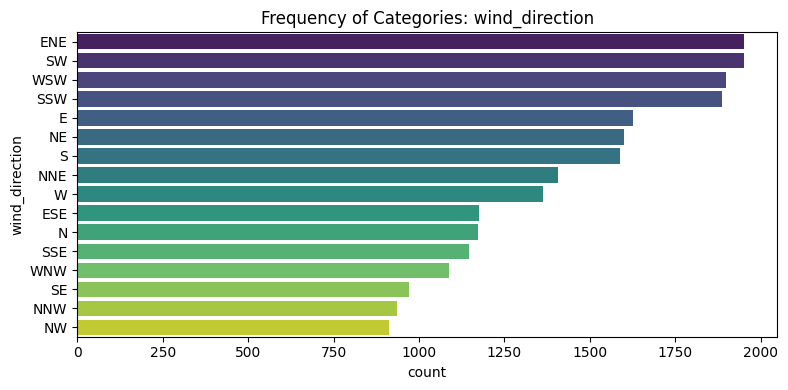

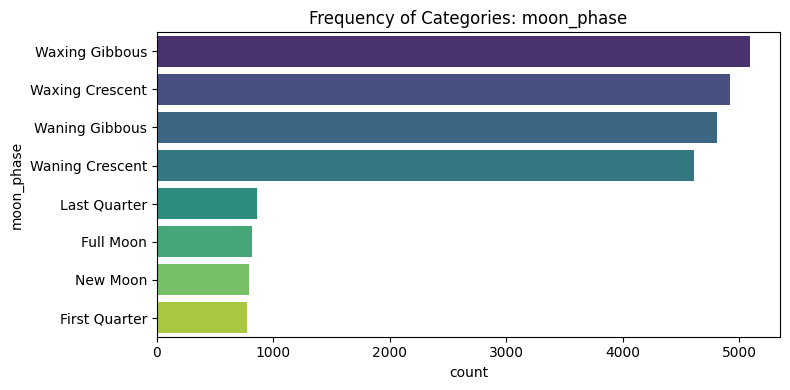

In [44]:
# --- CATEGORICAL DISTRIBUTIONS ---
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if df[col].nunique() <= 20:  # skip very high cardinality
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax, palette="viridis")
        ax.set_title(f"Frequency of Categories: {col}")
        fig.tight_layout()
        fig.savefig(os.path.join(save_dir, f"categories_{col}.png"))
        plt.show()

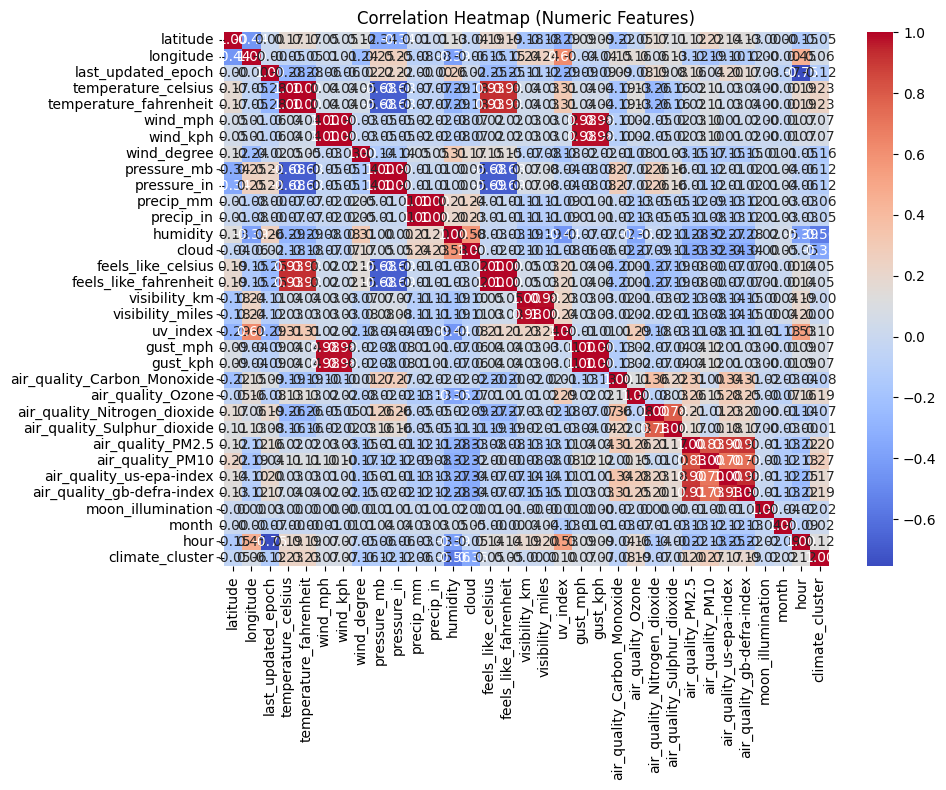

In [45]:
# --- HIGH CORRELATION CHECK ---
corr_matrix = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap (Numeric Features)")
fig.tight_layout()
fig.savefig(os.path.join(save_dir, "correlation_heatmap.png"))
plt.show()


In [46]:
from datetime import datetime

In [47]:
# --- 1. Invalid or Suspicious Values ---
# Example: negative or zero values in temperature, humidity, etc.
invalid_records = df[
    (df['temperature_celsius'] < -30) | 
    (df['humidity'] < 0) | 
    (df['humidity'] > 100) |
    (df['wind_kph'] < 0)
]
print(f"Invalid or suspicious rows found: {len(invalid_records)}")
display(invalid_records.head())


Invalid or suspicious rows found: 0


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,month,hour,climate_cluster


In [48]:
future_dates = df[df['last_updated'] > pd.Timestamp.now()]
print(f"Future timestamps found: {len(future_dates)}")

Future timestamps found: 0


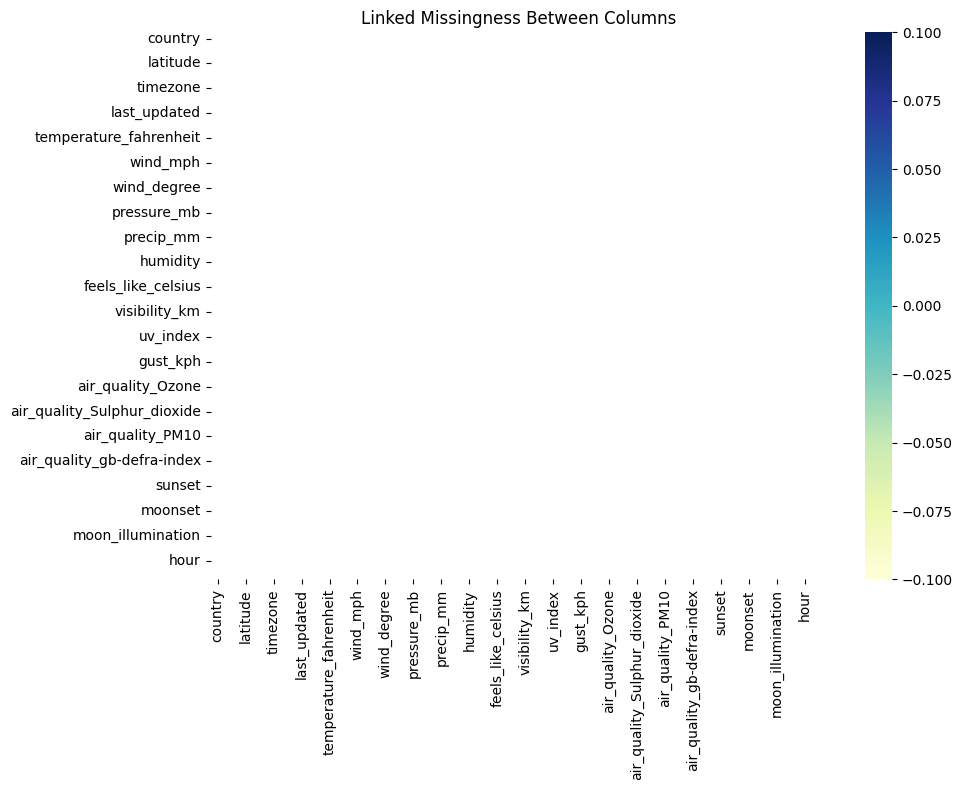

In [49]:
# Linked Nulls
missing_corr = df.isnull().astype(int).corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(missing_corr, cmap="YlGnBu", ax=ax)
ax.set_title("Linked Missingness Between Columns")
fig.tight_layout()
fig.savefig(os.path.join(save_dir, "linked_nulls_heatmap.png"))
plt.show()


In [50]:
# Duplicate Logic Check
dupes = df[df.duplicated(subset=['latitude', 'longitude', 'last_updated'], keep=False)]
print(f"Possible duplicate spatial-temporal rows: {len(dupes)}")


Possible duplicate spatial-temporal rows: 0
